# **18. 번역가는 대화에도 능하다 [프로젝트]**
<br>

# **18-1. Project: 멋진 챗봇 만들기**
<br>

### **라이브러리 버전을 확인해 봅니다**
<br>

In [1]:
import numpy as np
import pandas as pd
import tensorflow  as tf
import nltk

In [2]:
print(np.__version__)
print(pd.__version__)
print(tf.__version__)
print(nltk.__version__)

1.21.4
1.3.3
2.6.0
3.6.5


<br><br>

### **Step 1. 데이터 가져오기**
<br>

In [3]:
# 데이터 가져오기

In [4]:
!ls /aiffel/aiffel/AIFFEL/09_GD_NLP/Quest_06/data

ChatbotData.csv  ko.bin


In [5]:
df = pd.read_csv("/aiffel/aiffel/AIFFEL/09_GD_NLP/Quest_06/data/ChatbotData.csv")
df

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0
...,...,...,...
11818,훔쳐보는 것도 눈치 보임.,티가 나니까 눈치가 보이는 거죠!,2
11819,훔쳐보는 것도 눈치 보임.,훔쳐보는 거 티나나봐요.,2
11820,흑기사 해주는 짝남.,설렜겠어요.,2
11821,힘든 연애 좋은 연애라는게 무슨 차이일까?,잘 헤어질 수 있는 사이 여부인 거 같아요.,2


<br>

In [6]:
# 데이터의 질문과 답변을 각각 questions, answers 변수에 나눠서 저장하기

In [7]:
questions = df['Q'].tolist()
answers = df['A'].tolist()

In [8]:
print(len(questions))
print(len(answers))

11823
11823


In [9]:
print(questions[:5])
print(answers[:5])

['12시 땡!', '1지망 학교 떨어졌어', '3박4일 놀러가고 싶다', '3박4일 정도 놀러가고 싶다', 'PPL 심하네']
['하루가 또 가네요.', '위로해 드립니다.', '여행은 언제나 좋죠.', '여행은 언제나 좋죠.', '눈살이 찌푸려지죠.']


<br><br>

### **Step 2. 데이터 정제**
<br>

In [10]:
# 아래 조건을 만족하는 preprocess_sentence() 함수 구현
# 1. 영문자의 경우, 모두 소문자로 변환
# 2. 영문자와 한글, 숫자, 그리고 주요 특수문자를 제외하곤 정규식을 활용하여 모두 제거
# 문장부호 양옆에 공백을 추가하는 등 이전과 다르게 생략된 기능들은 우리가 사용할 토크나이저가 지원하기 때문에 굳이 구현하지 않아도 괜찮습니다!

In [11]:
import re

def preprocess_sentence(sentence):
    # 모든 영문자를 소문자로 변환합니다.
    sentence = sentence.lower()

    # 영문자, 한글, 숫자, 그리고 주요 특수문자를 제외한 모든 문자를 제거합니다.
    # 아래 정규식은 영문자(a-z), 한글(가-힣), 숫자(0-9), 그리고 주요 특수문자를 제외한 나머지 문자를 찾아냅니다.
    sentence = re.sub(r'[^a-z가-힣0-9,.?! ]', '', sentence)

    return sentence

<br><br>

### **Step 3. 데이터 토큰화**
<br>

In [12]:
from konlpy.tag import Mecab

def build_corpus(src_data, tgt_data, tokenizer, max_len=40):
    # 토큰화
    src_corpus = []
    tgt_corpus = []

    # 중복 체크를 위한 set
    pair_set = set()

    for src, tgt in zip(src_data, tgt_data):
        # 문장 정제
        src_clean = preprocess_sentence(src)
        tgt_clean = preprocess_sentence(tgt)

        # 토큰화
        src_tokens = tokenizer(src_clean)
        tgt_tokens = tokenizer(tgt_clean)

        # 토큰의 개수가 max_len 이하인지 확인
        if len(src_tokens) <= max_len and len(tgt_tokens) <= max_len:
            # 중복 문장 확인
            src_str = ' '.join(src_tokens)
            tgt_str = ' '.join(tgt_tokens)

            pair_str = src_str + " <SEP> " + tgt_str

            if pair_str not in pair_set:
                src_corpus.append(src_tokens)
                tgt_corpus.append(tgt_tokens)
                pair_set.add(pair_str)

    return src_corpus, tgt_corpus

<br>

In [13]:
# MeCab 토크나이저
mecab = Mecab()

In [14]:
# build_corpus 함수를 활용하여 토큰화
que_corpus, ans_corpus = build_corpus(questions, answers, mecab.morphs)

In [15]:
print(len(que_corpus))
print(len(ans_corpus))

11746
11746


In [16]:
print(que_corpus[:5])
print(ans_corpus[:5])

[['12', '시', '땡', '!'], ['1', '지망', '학교', '떨어졌', '어'], ['3', '박', '4', '일', '놀', '러', '가', '고', '싶', '다'], ['3', '박', '4', '일', '정도', '놀', '러', '가', '고', '싶', '다'], ['ppl', '심하', '네']]
[['하루', '가', '또', '가', '네요', '.'], ['위로', '해', '드립니다', '.'], ['여행', '은', '언제나', '좋', '죠', '.'], ['여행', '은', '언제나', '좋', '죠', '.'], ['눈살', '이', '찌푸려', '지', '죠', '.']]


<br><br>

### **Step 4. Augmentation**
<br>

In [17]:
# !pip install gensim==3.8.3

In [18]:
import gensim

w2v = gensim.models.Word2Vec.load("/aiffel/aiffel/AIFFEL/09_GD_NLP/Quest_06/data/ko.bin")

In [19]:
def lexical_sub(sentence, word2vec):
    import random

    res = []
    toks = sentence

    try:
        _from = random.choice(toks)
        _to = word2vec.most_similar(_from)[0][0]

    except:   # 단어장에 없는 단어 or other issues
        return None

    for tok in toks:
        if tok == _from: 
            res.append(_to)
        else: 
            res.append(tok)

    return res

<br>

In [20]:
# 데이터 Augmentation

In [21]:
def augment_corpus(que_corpus, ans_corpus, word2vec):
    augmented_que_corpus = []
    augmented_ans_corpus = []
    
    for sentence in que_corpus:
        augmented_sentence = lexical_sub(sentence, word2vec)
        if augmented_sentence: 
            augmented_que_corpus.append(augmented_sentence)
            augmented_ans_corpus.append(sentence)
    
    for sentence in ans_corpus:
        augmented_sentence = lexical_sub(sentence, word2vec)
        if augmented_sentence: 
            augmented_que_corpus.append(sentence)
            augmented_ans_corpus.append(augmented_sentence)
            
    return augmented_que_corpus, augmented_ans_corpus

In [22]:
augmented_que_corpus, augmented_ans_corpus = augment_corpus(que_corpus, ans_corpus, w2v)

/tmp/ipykernel_360/650141426.py:9: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  _to = word2vec.most_similar(_from)[0][0]


In [23]:
print(len(augmented_que_corpus))
print(len(augmented_ans_corpus))

20383
20383


In [24]:
print(augmented_que_corpus[:5])
print(augmented_ans_corpus[:5])

[['12', '시', '땡', '캐치'], ['1', '지망', '학교', '떨어졌', '어서'], ['3', '김', '4', '일', '놀', '러', '가', '고', '싶', '다'], ['3', '김', '4', '일', '정도', '놀', '러', '가', '고', '싶', '다'], ['ppl', '강하', '네']]
[['12', '시', '땡', '!'], ['1', '지망', '학교', '떨어졌', '어'], ['3', '박', '4', '일', '놀', '러', '가', '고', '싶', '다'], ['3', '박', '4', '일', '정도', '놀', '러', '가', '고', '싶', '다'], ['ppl', '심하', '네']]


<br>

In [25]:
# 원본 데이터에 augmented 데이터 합치기

In [26]:
all_que_corpus = que_corpus + augmented_que_corpus
all_ans_corpus = ans_corpus + augmented_ans_corpus

In [27]:
print(len(all_que_corpus))
print(len(all_ans_corpus))

32129
32129


In [28]:
print(all_que_corpus[:5])
print(all_ans_corpus[:5])

[['12', '시', '땡', '!'], ['1', '지망', '학교', '떨어졌', '어'], ['3', '박', '4', '일', '놀', '러', '가', '고', '싶', '다'], ['3', '박', '4', '일', '정도', '놀', '러', '가', '고', '싶', '다'], ['ppl', '심하', '네']]
[['하루', '가', '또', '가', '네요', '.'], ['위로', '해', '드립니다', '.'], ['여행', '은', '언제나', '좋', '죠', '.'], ['여행', '은', '언제나', '좋', '죠', '.'], ['눈살', '이', '찌푸려', '지', '죠', '.']]


<br><br>

### **Step 5. 데이터 벡터화**
<br>

In [29]:
all_ans_corpus = [["<start>"] + sentence + ["<end>"] for sentence in all_ans_corpus]

In [30]:
print(all_ans_corpus[0])

['<start>', '하루', '가', '또', '가', '네요', '.', '<end>']


<br>

In [31]:
from collections import Counter
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [32]:
# 1. 전체 단어 집합 생성 (all_que_corpus와 all_ans_corpus 결합)

In [33]:
all_corpus = all_que_corpus + all_ans_corpus
all_words = [word for sentence in all_corpus for word in sentence]

<br>

In [34]:
# 2. 단어와 정수 인덱스 간 매핑 만들기

In [35]:
word_freq = Counter(all_words)
vocab = ["<pad>", "<unk>"] + [word for word, freq in word_freq.items() if freq > 1]
word_to_index = {word: index for index, word in enumerate(vocab)}
index_to_word = {index: word for word, index in word_to_index.items()}

<br>

In [36]:
# 3. 데이터 벡터화 (각 문장을 해당 정수 인덱스의 시퀀스로 변환)

In [37]:
def convert_text_to_index(corpus, word_to_index, type):
    data = []
    for sentence in corpus:
        if type == "dec_input":  # 디코더 입력일 경우 <start> 토큰을 추가
            sentence = ["<start>"] + sentence
        if type == "dec_target":  # 디코더 출력일 경우 <end> 토큰을 추가
            sentence = sentence + ["<end>"]
        data.append([word_to_index.get(word, word_to_index["<unk>"]) for word in sentence])
    return data

In [38]:
enc_train = convert_text_to_index(all_que_corpus, word_to_index, "enc")
dec_input_train = convert_text_to_index(all_ans_corpus, word_to_index, "dec_input")
dec_target_train = convert_text_to_index(all_ans_corpus, word_to_index, "dec_target")

<br>

In [39]:
# 각 시퀀스의 길이를 동일하게 만들고, 데이터를 numpy array로 변환

In [40]:
max_len = max(len(s) for s in enc_train)
enc_train = pad_sequences(enc_train, maxlen=max_len, padding="post")
dec_input_train = pad_sequences(dec_input_train, maxlen=max_len, padding="post")
dec_target_train = pad_sequences(dec_target_train, maxlen=max_len, padding="post")

In [41]:
# 데이터를 원-핫 인코딩 형식으로 변환

In [42]:
dec_target_train = to_categorical(dec_target_train)

In [43]:
print(enc_train[0]) 
print(dec_input_train[0]) 
print(dec_target_train[0])

[2 3 4 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
[6872 6872  530   17  318   17 1839   87 6873    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [44]:
print(len(enc_train))
print(len(dec_input_train))
print(len(dec_target_train))

32129
32129
32129


<br><br>

### **Step 6. 훈련하기**
<br>

#### Transformer 모델 구현
<br>

In [45]:
# Positional Encoding

In [46]:
def positional_encoding(pos, d_model):
    def cal_angle(position, i):
        return position / np.power(10000, (2*(i//2)) / np.float32(d_model))

    def get_posi_angle_vec(position):
        return [cal_angle(position, i) for i in range(d_model)]

    sinusoid_table = np.array([get_posi_angle_vec(pos_i) for pos_i in range(pos)])

    sinusoid_table[:, 0::2] = np.sin(sinusoid_table[:, 0::2])
    sinusoid_table[:, 1::2] = np.cos(sinusoid_table[:, 1::2])

    return sinusoid_table

<br>

In [47]:
# Mask 생성

In [48]:
def generate_padding_mask(seq):
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
    return seq[:, tf.newaxis, tf.newaxis, :]

def generate_lookahead_mask(size):
    mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
    return mask

def generate_masks(src, tgt):
    enc_mask = generate_padding_mask(src)
    dec_enc_mask = generate_padding_mask(src)

    dec_lookahead_mask = generate_lookahead_mask(tgt.shape[1])
    dec_tgt_padding_mask = generate_padding_mask(tgt)
    dec_mask = tf.maximum(dec_tgt_padding_mask, dec_lookahead_mask)

    return enc_mask, dec_enc_mask, dec_mask

<br>

In [49]:
# Multi Head Attention 구현

In [50]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model

        self.depth = d_model // self.num_heads

        self.W_q = tf.keras.layers.Dense(d_model)
        self.W_k = tf.keras.layers.Dense(d_model)
        self.W_v = tf.keras.layers.Dense(d_model)

        self.linear = tf.keras.layers.Dense(d_model)

    def scaled_dot_product_attention(self, Q, K, V, mask):
        d_k = tf.cast(K.shape[-1], tf.float32)
        QK = tf.matmul(Q, K, transpose_b=True)

        scaled_qk = QK / tf.math.sqrt(d_k)

        if mask is not None: scaled_qk += (mask * -1e9)

        attentions = tf.nn.softmax(scaled_qk, axis=-1)
        out = tf.matmul(attentions, V)

        return out, attentions


    def split_heads(self, x):
        bsz = x.shape[0]
        split_x = tf.reshape(x, (bsz, -1, self.num_heads, self.depth))
        split_x = tf.transpose(split_x, perm=[0, 2, 1, 3])

        return split_x

    def combine_heads(self, x):
        bsz = x.shape[0]
        combined_x = tf.transpose(x, perm=[0, 2, 1, 3])
        combined_x = tf.reshape(combined_x, (bsz, -1, self.d_model))

        return combined_x


    def call(self, Q, K, V, mask):
        WQ = self.W_q(Q)
        WK = self.W_k(K)
        WV = self.W_v(V)

        WQ_splits = self.split_heads(WQ)
        WK_splits = self.split_heads(WK)
        WV_splits = self.split_heads(WV)

        out, attention_weights = self.scaled_dot_product_attention(
            WQ_splits, WK_splits, WV_splits, mask)

        out = self.combine_heads(out)
        out = self.linear(out)

        return out, attention_weights

<br>

In [51]:
# Position-wise Feed Forward Network

In [52]:
class PoswiseFeedForwardNet(tf.keras.layers.Layer):
    def __init__(self, d_model, d_ff):
        super(PoswiseFeedForwardNet, self).__init__()
        self.d_model = d_model
        self.d_ff = d_ff

        self.fc1 = tf.keras.layers.Dense(d_ff, activation='relu')
        self.fc2 = tf.keras.layers.Dense(d_model)

    def call(self, x):
        out = self.fc1(x)
        out = self.fc2(out)

        return out

<br>

In [53]:
# Encoder Layer

In [54]:
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, n_heads, d_ff, dropout):
        super(EncoderLayer, self).__init__()

        self.enc_self_attn = MultiHeadAttention(d_model, n_heads)
        self.ffn = PoswiseFeedForwardNet(d_model, d_ff)

        self.norm_1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.norm_2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.do = tf.keras.layers.Dropout(dropout)

    def call(self, x, mask):
        '''
        Multi-Head Attention
        '''
        residual = x
        out = self.norm_1(x)
        out, enc_attn = self.enc_self_attn(out, out, out, mask)
        out = self.do(out)
        out += residual

        '''
        Position-Wise Feed Forward Network
        '''
        residual = out
        out = self.norm_2(out)
        out = self.ffn(out)
        out = self.do(out)
        out += residual

        return out, enc_attn

<br>

In [55]:
# Decoder Layer

In [56]:
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, d_ff, dropout):
        super(DecoderLayer, self).__init__()

        self.dec_self_attn = MultiHeadAttention(d_model, num_heads)
        self.enc_dec_attn = MultiHeadAttention(d_model, num_heads)

        self.ffn = PoswiseFeedForwardNet(d_model, d_ff)

        self.norm_1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.norm_2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.norm_3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.do = tf.keras.layers.Dropout(dropout)

    def call(self, x, enc_out, dec_enc_mask, padding_mask):
        '''
        Masked Multi-Head Attention
        '''
        residual = x
        out = self.norm_1(x)
        out, dec_attn = self.dec_self_attn(out, out, out, padding_mask)
        out = self.do(out)
        out += residual

        '''
        Multi-Head Attention
        '''
        residual = out
        out = self.norm_2(out)
        # Q, K, V 순서에 주의하세요!
        out, dec_enc_attn = self.enc_dec_attn(Q=out, K=enc_out, V=enc_out, mask=dec_enc_mask)
        out = self.do(out)
        out += residual

        '''
        Position-Wise Feed Forward Network
        '''
        residual = out
        out = self.norm_3(out)
        out = self.ffn(out)
        out = self.do(out)
        out += residual

        return out, dec_attn, dec_enc_attn

<br>

In [57]:
# Encoder

In [58]:
class Encoder(tf.keras.Model):
    def __init__(self,
                    n_layers,
                    d_model,
                    n_heads,
                    d_ff,
                    dropout):
        super(Encoder, self).__init__()
        self.n_layers = n_layers
        self.enc_layers = [EncoderLayer(d_model, n_heads, d_ff, dropout)
                        for _ in range(n_layers)]

        self.do = tf.keras.layers.Dropout(dropout)

    def call(self, x, mask):
        out = x

        enc_attns = list()
        for i in range(self.n_layers):
            out, enc_attn = self.enc_layers[i](out, mask)
            enc_attns.append(enc_attn)

        return out, enc_attn

<br>

In [59]:
# Decoder

In [60]:
class Decoder(tf.keras.Model):
    def __init__(self,
                    n_layers,
                    d_model,
                    n_heads,
                    d_ff,
                    dropout):
        super(Decoder, self).__init__()
        self.n_layers = n_layers
        self.dec_layers = [DecoderLayer(d_model, n_heads, d_ff, dropout)
                            for _ in range(n_layers)]

    def call(self, x, enc_out, dec_enc_mask, padding_mask):
        out = x

        dec_attns = list()
        dec_enc_attns = list()
        for i in range(self.n_layers):
            out, dec_attn, dec_enc_attn = \
            self.dec_layers[i](out, enc_out, dec_enc_mask, padding_mask)

            dec_attns.append(dec_attn)
            dec_enc_attns.append(dec_enc_attn)

        return out, dec_attns, dec_enc_attns

<br>

In [61]:
# Transformer 전체 모델 조립

In [62]:
class Transformer(tf.keras.Model):
    def __init__(self,
                    n_layers,
                    d_model,
                    n_heads,
                    d_ff,
                    src_vocab_size,
                    tgt_vocab_size,
                    pos_len,
                    dropout=0.2,
                    shared_fc=True,
                    shared_emb=False):
        super(Transformer, self).__init__()

        self.d_model = tf.cast(d_model, tf.float32)

        if shared_emb:
            self.enc_emb = self.dec_emb = \
            tf.keras.layers.Embedding(src_vocab_size, d_model)
        else:
            self.enc_emb = tf.keras.layers.Embedding(src_vocab_size, d_model)
            self.dec_emb = tf.keras.layers.Embedding(tgt_vocab_size, d_model)

        self.pos_encoding = positional_encoding(pos_len, d_model)
        self.do = tf.keras.layers.Dropout(dropout)

        self.encoder = Encoder(n_layers, d_model, n_heads, d_ff, dropout)
        self.decoder = Decoder(n_layers, d_model, n_heads, d_ff, dropout)

        self.fc = tf.keras.layers.Dense(tgt_vocab_size)

        self.shared_fc = shared_fc

        if shared_fc:
            self.fc.set_weights(tf.transpose(self.dec_emb.weights))

    def embedding(self, emb, x):
        seq_len = x.shape[1]

        out = emb(x)

        if self.shared_fc: out *= tf.math.sqrt(self.d_model)

        out += self.pos_encoding[np.newaxis, ...][:, :seq_len, :]
        out = self.do(out)

        return out


    def call(self, enc_in, dec_in, enc_mask, dec_enc_mask, dec_mask):
        enc_in = self.embedding(self.enc_emb, enc_in)
        dec_in = self.embedding(self.dec_emb, dec_in)

        enc_out, enc_attns = self.encoder(enc_in, enc_mask)

        dec_out, dec_attns, dec_enc_attns = \
        self.decoder(dec_in, enc_out, dec_enc_mask, dec_mask)

        logits = self.fc(dec_out)

        return logits, enc_attns, dec_attns, dec_enc_attns

<br>

#### 주요 파라미터 설정 및 모델 인스턴스 생성
<br>

In [63]:
# 하이퍼파라미터 설정
n_layers = 1
d_model = 368
n_heads = 8
d_ff = 1024
dropout = 0.2

In [64]:
# 훈련 파라미터 설정
warmup_steps = 1000
batch_size = 64
EPOCHS = 10

<br>

In [65]:
# 모델 인스턴스 생성

In [66]:
VOCAB_SIZE = max(
    np.max(enc_train),
    np.max(dec_input_train),
    np.max(dec_target_train)
) + 1

In [67]:
transformer = Transformer(
    n_layers=n_layers,
    d_model=d_model,
    n_heads=n_heads,
    d_ff=d_ff,
    src_vocab_size=VOCAB_SIZE,
    tgt_vocab_size=VOCAB_SIZE,
    pos_len=200,  
    dropout=dropout,
    shared_fc=True,
    shared_emb=True
)

<br>

#### Learning Rate & Optimizer, Loss Function 정의
<br>

In [68]:
# Learning Rate Scheduler 구현

In [69]:
class LearningRateScheduler(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(LearningRateScheduler, self).__init__()

        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        step = tf.cast(step, tf.float32)  # 형변환 추가
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps**-1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [70]:
# Learning Rate 인스턴스 선언

In [71]:
learning_rate = LearningRateScheduler(d_model, warmup_steps=warmup_steps)

<br>

In [72]:
# Optimizer 구현

In [73]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

<br>

In [74]:
# Loss Function 정의

In [75]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

In [76]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')(real, pred)
    
    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    # 여기에서 안전한 로그를 계산
    loss_ = tf.where(tf.math.is_nan(loss_), tf.zeros_like(loss_), loss_)
    
    return tf.reduce_sum(loss_)/tf.reduce_sum(mask)

<br>

#### Train Step 정의
<br>

In [77]:
# train_step 함수 정의

In [78]:
@tf.function()
def train_step(src, tgt, model, optimizer):
    tgt_in = tgt[:, :-1]
    gold = tgt[:, 1:]
    enc_mask, dec_enc_mask, dec_mask = generate_masks(src, tgt_in)

    with tf.GradientTape() as tape:
        predictions, _, _, _ = model(src, tgt_in, enc_mask, dec_enc_mask, dec_mask)
        loss = loss_function(gold, predictions)

    gradients = tape.gradient(loss, model.trainable_variables)
    gradients, _ = tf.clip_by_global_norm(gradients, 5.0)  # 클리핑 추가
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    return loss

<br>

In [79]:
# validation_step 함수 정의

In [80]:
@tf.function()
def val_step(src, tgt, model):
    tgt_in = tgt[:, :-1]  # Decoder의 input
    gold = tgt[:, 1:]     # Decoder의 output 비교 대상

    enc_mask, dec_enc_mask, dec_mask = generate_masks(src, tgt_in)
    predictions, _, _, _ = model(src, tgt_in, enc_mask, dec_enc_mask, dec_mask)
    loss = loss_function(gold, predictions)

    return loss

<br>

#### 데이터 분리(train / validation)
<br>

In [81]:
# 데이터의 전체 길이
total_len = len(enc_train)

# 분할 지점 계산 (90% 지점)
split_idx = int(total_len * 0.9)

In [82]:
# 데이터 분할
enc_val = enc_train[split_idx:]
enc_train = enc_train[:split_idx]

dec_input_val = dec_input_train[split_idx:]
dec_input_train = dec_input_train[:split_idx]

dec_target_val = dec_target_train[split_idx:]
dec_target_train = dec_target_train[:split_idx]

<br>

In [81]:
# from sklearn.model_selection import train_test_split

# enc_train, enc_val, \
# dec_input_train, dec_input_val, \
# dec_target_train, dec_target_val = train_test_split(
#     enc_train, dec_input_train, dec_target_train, test_size=0.1)

<br>

In [84]:
# import numpy as np

# def custom_train_test_split(*arrays, test_size=0.1, random_seed=None):
#     # Set random seed for reproducibility
#     np.random.seed(random_seed)
    
#     # Check if there's any array to split
#     if len(arrays) == 0:
#         raise ValueError("At least one array required as input")
    
#     # Check if all arrays have the same length
#     first_array_length = len(arrays[0])
#     for array in arrays:
#         if len(array) != first_array_length:
#             raise ValueError("All input arrays must have the same length")
    
#     # Calculate indices to split
#     indices = np.arange(first_array_length)
#     np.random.shuffle(indices)
    
#     split_idx = int(first_array_length * (1 - test_size))
#     train_idx = indices[:split_idx]
#     test_idx = indices[split_idx:]
    
#     # Split the arrays
#     result = []
#     for array in arrays:
#         result.append(array[train_idx])
#         result.append(array[test_idx])
    
#     return result

In [85]:
# def simple_train_test_split(*arrays, test_size=0.1, random_seed=None):
#     # Set random seed for reproducibility
#     np.random.seed(random_seed)
    
#     # Ensure arrays are not empty and have the same length
#     if len(arrays) == 0:
#         raise ValueError("At least one array required as input")

#     first_array_length = len(arrays[0])
#     for array in arrays[1:]:
#         if len(array) != first_array_length:
#             raise ValueError("All input arrays must have the same length")
    
#     # Shuffle and split indices
#     indices = np.arange(first_array_length)
#     np.random.shuffle(indices)
    
#     split_idx = int(first_array_length * (1 - test_size))
    
#     # Use list comprehension to split arrays
#     return tuple(array[indices[:split_idx]] for array in arrays) + tuple(array[indices[split_idx:]] for array in arrays)

In [86]:
# def sequential_train_test_split(*arrays, test_size=0.1):
#     # Ensure arrays are not empty and have the same length
#     if len(arrays) == 0:
#         raise ValueError("At least one array required as input")

#     first_array_length = len(arrays[0])
#     for array in arrays[1:]:
#         if len(array) != first_array_length:
#             raise ValueError("All input arrays must have the same length")
    
#     # Calculate split index
#     split_idx = int(first_array_length * (1 - test_size))
    
#     # Split arrays without shuffling
#     return tuple(array[:split_idx] for array in arrays) + tuple(array[split_idx:] for array in arrays)

In [87]:
# 데이터 분할 비율 설정
# train_ratio = 0.9

In [88]:
# 함수 호출
# enc_train, enc_val, dec_input_train, dec_input_val, dec_target_train, dec_target_val = custom_train_test_split(
#     enc_train, dec_input_train, dec_target_train, test_size=1-train_ratio
# )

<br>

In [89]:
# import numpy as np

# # 랜덤 시드 설정 (원하시는 값을 사용하실 수 있습니다.)
# random_seed = None
# np.random.seed(random_seed)

# # 첫 번째 배열의 길이 확인
# first_array_length = len(enc_train)

In [82]:
# 분할 비율 설정
test_size = 0.1

In [91]:
# 데이터 인덱스 생성 및 셔플
# indices = np.arange(first_array_length)
# np.random.shuffle(indices)

In [92]:
# 분할 지점 계산
# split_idx = int(first_array_length * (1 - test_size))
# train_idx = indices[:split_idx]
# test_idx = indices[split_idx:]

In [ ]:
# 각 배열 분할 및 할당
# enc_train, enc_val = enc_train[train_idx], enc_train[test_idx]
# dec_input_train, dec_input_val = dec_input_train[train_idx], dec_input_train[test_idx]
# dec_target_train, dec_target_val = dec_target_train[train_idx], dec_target_train[test_idx]

<br>

In [83]:
# # 데이터의 전체 길이
# first_array_length = len(enc_train)

# # 인덱스를 생성하고 섞습니다.
# indices = np.arange(first_array_length)
# np.random.shuffle(indices)

# # 분할 지점을 계산합니다.
# split_idx = int(first_array_length * (1 - test_size))

# # 인덱스만 저장합니다.
# train_indices = indices[:split_idx]
# val_indices = indices[split_idx:]

In [83]:
# # 예시: 배치 데이터를 가져올 때
# enc_train = enc_train[train_indices]
# dec_input_train = dec_input_train[train_indices]
# dec_target_train = dec_target_train[train_indices]

# # 검증 데이터를 가져올 때
# enc_val = enc_train[val_indices]
# dec_input_val = dec_input_train[val_indices]
# dec_target_val = dec_target_train[val_indices]

<br>

In [84]:
print("Training data size for enc_train:", len(enc_train))
print("Validation data size for enc_val:", len(enc_val))
print("Training data size for dec_input_train:", len(dec_input_train))
print("Validation data size for dec_input_val:", len(dec_input_val))
print("Training data size for dec_target_train:", len(dec_target_train))
print("Validation data size for dec_target_val:", len(dec_target_val))

Training data size for enc_train: 28916
Validation data size for enc_val: 3213
Training data size for dec_input_train: 28916
Validation data size for dec_input_val: 3213
Training data size for dec_target_train: 28916
Validation data size for dec_target_val: 3213


<br>

#### 훈련시키기
<br>

In [85]:
from tqdm import tqdm

In [86]:
EPOCHS = 15
BATCH_SIZE = 64
N_BATCHES = len(enc_train) // BATCH_SIZE

train_losses = []
val_losses = []

for epoch in range(EPOCHS):
    total_loss = 0

    tqdm_bar = tqdm(total=N_BATCHES, position=0, leave=True, desc=f"Training Epoch {epoch+1}")

    # Training
    for batch in range(N_BATCHES):
        # 데이터 인덱싱 및 배치 처리
        start_idx = batch * BATCH_SIZE
        end_idx = (batch + 1) * BATCH_SIZE
        
        src = enc_train[start_idx:end_idx]
        dec_input = dec_input_train[start_idx:end_idx]
        dec_target = dec_target_train[start_idx:end_idx]

        batch_loss = train_step(src, dec_input, transformer, optimizer)
        total_loss += batch_loss

        # tqdm progress bar update
        tqdm_bar.set_description(f"Epoch {epoch + 1} Batch {batch + 1} Loss {batch_loss.numpy():.4f}")
        tqdm_bar.update(1)

    tqdm_bar.close()
    
    # Validation Loss 계산
    val_loss = 0
    for batch in range(N_BATCHES):
        start_idx = batch * BATCH_SIZE
        end_idx = (batch + 1) * BATCH_SIZE
        
        src = enc_val[start_idx:end_idx]
        dec_input = dec_input_val[start_idx:end_idx]
        dec_target = dec_target_val[start_idx:end_idx]

        batch_val_loss = val_step(src, dec_input, transformer)
        val_loss += batch_val_loss

    avg_train_loss = total_loss / N_BATCHES
    avg_val_loss = val_loss / N_BATCHES
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    
    print(f'Epoch {epoch + 1} Train Loss {avg_train_loss:.4f} Val Loss {avg_val_loss:.4f}')


Epoch 1 Batch 451 Loss 2.1294: 100%|██████████| 451/451 [00:33<00:00, 13.59it/s]


Epoch 1 Train Loss 4.0201 Val Loss nan


Epoch 2 Batch 451 Loss 0.9978: 100%|██████████| 451/451 [00:17<00:00, 25.56it/s]


Epoch 2 Train Loss 2.5868 Val Loss nan


Epoch 3 Batch 451 Loss 0.5832: 100%|██████████| 451/451 [00:17<00:00, 25.12it/s]


Epoch 3 Train Loss 1.9425 Val Loss nan


Epoch 4 Batch 451 Loss 0.4218: 100%|██████████| 451/451 [00:18<00:00, 24.68it/s]


Epoch 4 Train Loss 1.5736 Val Loss nan


Epoch 5 Batch 451 Loss 0.3633: 100%|██████████| 451/451 [00:18<00:00, 24.41it/s]


Epoch 5 Train Loss 1.3433 Val Loss nan


Epoch 6 Batch 451 Loss 0.3022: 100%|██████████| 451/451 [00:18<00:00, 23.95it/s]


Epoch 6 Train Loss 1.1769 Val Loss nan


Epoch 7 Batch 451 Loss 0.2780: 100%|██████████| 451/451 [00:18<00:00, 24.06it/s]


Epoch 7 Train Loss 1.0536 Val Loss nan


Epoch 8 Batch 451 Loss 0.2573: 100%|██████████| 451/451 [00:18<00:00, 24.39it/s]


Epoch 8 Train Loss 0.9466 Val Loss nan


Epoch 9 Batch 451 Loss 0.2435: 100%|██████████| 451/451 [00:18<00:00, 24.40it/s]


Epoch 9 Train Loss 0.8490 Val Loss nan


Epoch 10 Batch 451 Loss 0.2268: 100%|██████████| 451/451 [00:18<00:00, 24.21it/s]


Epoch 10 Train Loss 0.7552 Val Loss nan


Epoch 11 Batch 451 Loss 0.2186: 100%|██████████| 451/451 [00:18<00:00, 24.18it/s]


Epoch 11 Train Loss 0.6745 Val Loss nan


Epoch 12 Batch 451 Loss 0.2004: 100%|██████████| 451/451 [00:18<00:00, 24.21it/s]


Epoch 12 Train Loss 0.6117 Val Loss nan


Epoch 13 Batch 451 Loss 0.1960: 100%|██████████| 451/451 [00:18<00:00, 24.29it/s]


Epoch 13 Train Loss 0.5555 Val Loss nan


Epoch 14 Batch 451 Loss 0.1825: 100%|██████████| 451/451 [00:18<00:00, 24.40it/s]


Epoch 14 Train Loss 0.5022 Val Loss nan


Epoch 15 Batch 451 Loss 0.1857: 100%|██████████| 451/451 [00:18<00:00, 24.28it/s]


Epoch 15 Train Loss 0.4547 Val Loss nan


In [87]:
print(np.isnan(enc_train).any())
print(np.isnan(enc_val).any())
print(np.isnan(dec_input_train).any())
print(np.isnan(dec_input_val).any())

False
False
False
False


In [88]:
print(f"Batch {batch}, Loss: {batch_loss.numpy()}")

Batch 450, Loss: 0.1856992393732071


In [89]:
invalid_indices = [i for i, s in enumerate(enc_train) if len(s) == 0]
if invalid_indices:
    print(f"Found {len(invalid_indices)} invalid samples in enc_train")

In [90]:
for batch in range(N_BATCHES):
    start_idx = batch * BATCH_SIZE
    end_idx = (batch + 1) * BATCH_SIZE

    src = enc_val[start_idx:end_idx]
    dec_input = dec_input_val[start_idx:end_idx]
    dec_target = dec_target_val[start_idx:end_idx]

    batch_val_loss = val_step(src, dec_input, transformer)
    val_loss += batch_val_loss
    
    print(f"Validation Batch {batch}, Loss: {batch_val_loss.numpy()}")

Validation Batch 0, Loss: 0.5736705660820007
Validation Batch 1, Loss: 0.5693771839141846
Validation Batch 2, Loss: 0.6407707929611206
Validation Batch 3, Loss: 0.7596200108528137
Validation Batch 4, Loss: 0.6182177066802979
Validation Batch 5, Loss: 0.7638334631919861
Validation Batch 6, Loss: 0.5183248519897461
Validation Batch 7, Loss: 0.6722216010093689
Validation Batch 8, Loss: 0.9318565130233765
Validation Batch 9, Loss: 0.9613356590270996
Validation Batch 10, Loss: 0.8023685216903687
Validation Batch 11, Loss: 0.6581697463989258
Validation Batch 12, Loss: 0.6966259479522705
Validation Batch 13, Loss: 0.7694821357727051
Validation Batch 14, Loss: 0.6459240913391113
Validation Batch 15, Loss: 0.8792791366577148
Validation Batch 16, Loss: 0.8188066482543945
Validation Batch 17, Loss: 0.8949643969535828
Validation Batch 18, Loss: 0.767177164554596
Validation Batch 19, Loss: 0.8699151277542114
Validation Batch 20, Loss: 0.8821015357971191
Validation Batch 21, Loss: 0.7162009477615356

<br>

#### 훈련 과정 시각화 
<br>

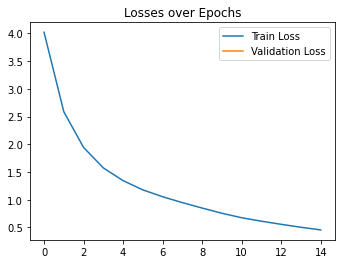

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.legend()
plt.title('Losses over Epochs')

plt.show()

<br>

#### 모델 평가
<br>

In [92]:
# Evaluation function

In [93]:
def evaluate(sentence):
    sentence = preprocess_sentence(sentence)
    tokens = mecab.morphs(sentence)
    tokenized_sentence = [word_to_index.get(token, word_to_index["<unk>"]) for token in tokens]
    tokenized_sentence = tf.expand_dims(tokenized_sentence, 0)
    dec_input = tf.expand_dims([word_to_index["<start>"]], 0)
    output_sequence = []

    for _ in range(40):  # Assuming MAX_LENGTH is 40
        enc_mask, dec_enc_mask, dec_mask = generate_masks(tokenized_sentence, dec_input)
        predictions, _, _, _ = transformer(tokenized_sentence, dec_input, enc_mask, dec_enc_mask, dec_mask)
        predicted_id = tf.argmax(predictions[:, -1, :], axis=-1)
        predicted_id = tf.cast(predicted_id, tf.int32)
        predicted_id = tf.expand_dims(predicted_id, axis=0)
        dec_input = tf.concat([dec_input, predicted_id], axis=-1)
        if predicted_id.numpy()[0][0] == word_to_index["<end>"]:
            break
    translated_sentence = ' '.join([index_to_word[index] for index in dec_input.numpy()[0] if index != word_to_index["<start>"]])

    return translated_sentence

In [94]:
samples = [
    "지루하다, 놀러가고 싶어.",
    "오늘 일찍 일어났더니 피곤하다.",
    "간만에 여자친구랑 데이트 하기로 했어.",
    "집에 있는다는 소리야.",
    "내일 밤 늦게 만나서 얘기나누자.",
    "오늘은 너무 행복한 날이야.",
    "죽고싶니? 너 머하는 놈이야?"
]

In [95]:
translations = []
for idx, sentence in enumerate(samples):
    translation = evaluate(sentence)
    translations.append(f"> {idx+1}. {translation}")

# for translation in translations:
#     print(translation)

In [96]:
prefix = "> "

hyperparameters = [
    f"n_layers: {n_layers}",
    f"d_model: {d_model}",
    f"n_heads: {n_heads}",
    f"d_ff: {d_ff}",
    f"dropout: {dropout}"
]
hyperparameters = [prefix + item for item in hyperparameters]

training_parameters = [
    f"Warmup Steps: {warmup_steps}",
    f"Batch Size: {BATCH_SIZE}",
    f"Epoch At: {EPOCHS}"
]
training_parameters = [prefix + item for item in training_parameters]

In [97]:
final_output = "\n\n".join(["Translations"] + translations + hyperparameters + training_parameters)

In [98]:
print(final_output)

Translations

> 1. 답답 하 다 , 놀 러 가 고 싶 어 . <end>

> 2. 아침 일찍 잘못 더니 피곤 하 다 . <end>

> 3. 간만에 여자 친구 랑 데이트 하 기 로 했 어 . <end>

> 4. 집 에 있 ㄴ다는 거 야 . <end>

> 5. 내일 밤 늦 게 만나 서 서 얘기 자 . <end>

> 6. 오늘 은데 너무 행복 한 날 이 야 . <end>

> 7. 죽 고 싶 니 ? 악몽 이 시키 는 데 이 야 ? <end>

> n_layers: 1

> d_model: 368

> n_heads: 8

> d_ff: 1024

> dropout: 0.2

> Warmup Steps: 1000

> Batch Size: 64

> Epoch At: 15


<br><br>

### **Step 7. 성능 측정하기**
<br>

#### BLEU Score로 성능 측정하기
<br>

In [99]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

In [100]:
def calculate_bleu_single(sentence, reference_sentence, verbose=True):
    # preprocess and tokenize input sentence
    sentence = preprocess_sentence(sentence)
    tokens = mecab.morphs(sentence)
    tokenized_sentence = [word_to_index.get(token, word_to_index["<unk>"]) for token in tokens]

    # get predicted translation
    translation = evaluate(sentence)
    candidate = translation.split()

    # get reference translation
    reference = reference_sentence.split()

    # calculate BLEU score
    score = sentence_bleu([reference], candidate, smoothing_function=SmoothingFunction().method1)

    if verbose:
        print("Source Sentence: ", sentence)
        print("Model Prediction: ", candidate)
        print("Real: ", reference)
        print("Score: %lf\n" % score)

    return score

In [105]:
sample_question = "이따 만나요."
sample_answer = "네 조금 이따 봐요."

In [106]:
score = calculate_bleu_single(sample_question, sample_answer)
print(f"Bleu Score for the single sentence pair: {score}")

Source Sentence:  이따 만나요.
Model Prediction:  ['이따', '마주치', '요', '는데', '<end>']
Real:  ['네', '조금', '이따', '봐요.']
Score: 0.053728

Bleu Score for the single sentence pair: 0.05372849659117709


<br>

In [113]:
def calculate_bleu(sentences, reference_sentences, verbose=True):
    total_score = 0.0
    sample_size = len(sentences)

    for idx in range(sample_size):
        score = calculate_bleu_single(sentences[idx], reference_sentences[idx], verbose)
        total_score += score

    print("Num of Sample:", sample_size)
    print("Total Score:", total_score / sample_size)

In [114]:
sample_questions = questions[:10]  
sample_answers = answers[:10] 

In [115]:
calculate_bleu(sample_questions, sample_answers)

Source Sentence:  12시 땡!
Model Prediction:  ['하루', '가', '또', '가', '캐치', '<end>']
Real:  ['하루가', '또', '가네요.']
Score: 0.040825

Source Sentence:  1지망 학교 떨어졌어
Model Prediction:  ['위로', '해', '드립니다', '.', '<end>']
Real:  ['위로해', '드립니다.']
Score: 0.000000

Source Sentence:  3박4일 놀러가고 싶다
Model Prediction:  ['신혼', '여행', '4', '일', '놀', 'ㄹ래', '가', '고', '싶', '다', '<end>']
Real:  ['여행은', '언제나', '좋죠.']
Score: 0.000000

Source Sentence:  3박4일 정도 놀러가고 싶다
Model Prediction:  ['신혼', '여행', '4', '일', '정도', '놀', '러', '가', '고', '싶', '다', '<end>']
Real:  ['여행은', '언제나', '좋죠.']
Score: 0.000000

Source Sentence:  ppl 심하네
Model Prediction:  ['눈살', '이', '찌푸려', '지', '죠', '.', '<end>']
Real:  ['눈살이', '찌푸려지죠.']
Score: 0.000000

Source Sentence:  sd카드 망가졌어
Model Prediction:  ['다시', '새로', '사', '는', '게', '살', '다시', '다시', '다시', '조절', '<end>']
Real:  ['다시', '새로', '사는', '게', '마음', '편해요.']
Score: 0.044116

Source Sentence:  sd카드 안돼
Model Prediction:  ['다시', '새로', '안', '돼', '<end>']
Real:  ['다시', '새로', '사는', '게', '마음', '편해요.

<br>

#### SmoothingFunction()으로 BLEU Score 보정하기
<br>

In [108]:
def calculate_bleu_single(sentence, reference_sentence, verbose=True, weights=[0.25, 0.25, 0.25, 0.25]):
    # preprocess and tokenize input sentence
    sentence = preprocess_sentence(sentence)
    tokens = mecab.morphs(sentence)
    tokenized_sentence = [word_to_index.get(token, word_to_index["<unk>"]) for token in tokens]

    # get predicted translation
    translation = evaluate(sentence)
    candidate = translation.split()

    # get reference translation
    reference = reference_sentence.split()

    # calculate BLEU score with smoothing function
    score = sentence_bleu([reference], 
                          candidate, 
                          weights=weights, 
                          smoothing_function=SmoothingFunction().method1)

    if verbose:
        print("Source Sentence: ", sentence)
        print("Model Prediction: ", candidate)
        print("Real: ", reference)
        print("Score: %lf\n" % score)

    return score

In [109]:
sample_question = "이따 만나요."
sample_answer = "네 조금 이따 봐요."

In [110]:
score = calculate_bleu_single(sample_question, sample_answer)
print(f"Bleu Score for the single sentence pair: {score}")

Source Sentence:  이따 만나요.
Model Prediction:  ['이따', '마주치', '요', '는데', '<end>']
Real:  ['네', '조금', '이따', '봐요.']
Score: 0.053728

Bleu Score for the single sentence pair: 0.05372849659117709


<br>

In [116]:
def calculate_bleu(reference, candidate, weights=[0.25, 0.25, 0.25, 0.25]):
    return sentence_bleu([reference],
                         candidate,
                         weights=weights,
                         smoothing_function=SmoothingFunction().method1)  # Apply smoothing function

In [117]:
# Example usage
reference_sentence = "저는 책을 좋아합니다."
predicted_sentence = "저는 책을 좋아해요."

In [118]:
reference_tokens = reference_sentence.split()
predicted_tokens = predicted_sentence.split()

In [119]:
bleu_score = calculate_bleu(reference_tokens, predicted_tokens)
print(f"Bleu Score: {bleu_score}")

Bleu Score: 0.24028114141347542


<br><br>

# **18-2. 프로젝트 제출**
<br>

### **루브릭**
<br>

#### **평가문항 및 상세기준**

##### 1. 챗봇 훈련데이터 전처리 과정이 체계적으로 진행되었는가?

챗봇 훈련데이터를 위한 전처리와 augmentation이 적절히 수행되어 3만개 가량의 훈련데이터셋이 구축되었다.

##### 2. transformer 모델을 활용한 챗봇 모델이 과적합을 피해 안정적으로 훈련되었는가?

과적합을 피할 수 있는 하이퍼파라미터 셋이 적절히 제시되었다.

##### 3. 챗봇이 사용자의 질문에 그럴듯한 형태로 답하는 사례가 있는가?

주어진 예문을 포함하여 챗봇에 던진 질문에 적절히 답하는 사례가 제출되었다.